# Multicollinearity

## Question a)
Run the following lines in Python:


In [1]:
import numpy as np
np.random.seed(0)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100)/10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

The model is a linear combination and can be written as: \\

y = 2 + 2${X}_1$ + 0.3${X}_2$ + ϵ

The regression coefficients are:
*   Intercept: 2
*   Coefficient for ${X}_1$: 2
*   Coefficient for ${X}_2$: 0.3

ϵ is the normally distributed noise.


## Question b)
#### What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

0.8192633558220391


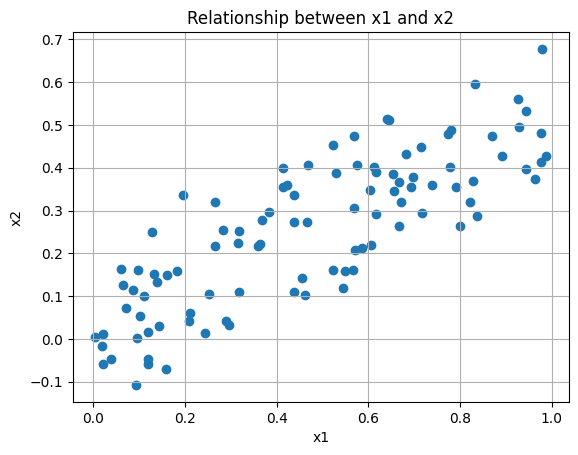

In [2]:
# References:
# To find correlation: Numpy documentation: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
# Making a scatterplot and understanding correlation: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
# More info on how to read correlation: https://online.stat.psu.edu/stat501/lesson/12/12.3
import matplotlib.pyplot as plt

np.random.seed(0)

# Find correlation between x1 and x2
corr = np.corrcoef(x1, x2)
print(corr[0][1]) # Index for correlation between x1 and x2

# Create a scatterplot
plt.scatter(x1, x2)
plt.title('Relationship between x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

The correlation between ${x}_1$ and ${x}_2$ is ~0.82. This shows that there is a strong positive linear relationship between them, indicating multicollinearity between them.

In the scatterplot, you can see the positive linear relationship as well (${x}_1$ increases as ${x}_2$ increases).

## Question c)
#### Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are ${\hat{β}}_0$, ${\hat{β}}_1$, and ${\hat{β}}_2$? How do these relate to the true ${β}_0$, ${β}_1$, and ${β}_2$? Can you reject the null hypothesis ${H}_0$ : ${β}_1$ = 0? How about the null hypothesis ${H}_0$ : ${β}_2$ = 0?

In [3]:
# References:
# Create 2-D array by stacking 1-D arrays as columns: https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html
# Linear regression on linear equation: https://365datascience.com/tutorials/python-tutorials/linear-regression/

import sklearn.linear_model as skl_lm
import statsmodels.api as sm

# Specify linear regression model
#regr = skl_lm.LinearRegression()

# Create 2D array for X
X_comb = np.column_stack((x1, x2))

# Include a constant term (for the intercept)
X = sm.add_constant(X_comb)
model = sm.OLS(y,X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.16e-07
Time:                        05:22:45   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9217      0.191     10.071      0.000       1.543       2.300
x1             1.2007      0.597      2.011      0.047       0.016       2.385
x2             1.4931      0.991      1.507      0.135      -0.473       3.459
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Estimated coefficients are:**

#### Intercept ($\hat{{β}}_0$): 1.922
#### Coefficient for ${x}_1$($\hat{{β}}_1$): 1.200
#### Coefficient for ${x}_2$($\hat{{β}}_2$): 1.493

**True coefficients are:**

#### Intercept (${β}_0$): 2
#### Coefficient ${x}_1$(${β}_1$): 2
#### Coefficient ${x}_2$(${β}_2$): 0.3

The estimated coefficients are different from the true values. The intercept is almost equal, but ${x}_1$(${β}_1$) and ${x}_2$(${β}_2$) are less accurate. This could be due to the added noise in the data, or the collinearity between ${x}_1$ and ${x}_2$ coming from their high correlation.

**Hypothesis Tests:**

#### For ${H}_0$:${β}_1$ = 0:

The p-value for ${x}_1$ is 0.047 which is less than 0.05, so we reject the null hypothesis. This indicates that ${x}_1$ has a significant linear relationship with y.

#### For ${H}_0$:${β}_2$ = 0:
The p-value for ${x}_2$ is 0.135 which is greater than 0.05, so we cannot reject the null hypothesis. This indicates that ${x}_2$ does not have a statistically significant linear relationship with y.



The model's ${R}^2$ value is 0.261, indicating that approximately 26.1% of the variance in y is explained by ${x}_1$ and ${x}_2$. This relatively low ${R}^2$ value, along with the discrepancies in the estimated coefficients compared to the true ones, suggests that while there is a significant linear relationship between, the overall model fit could be improved, possibly by considering additional factors or addressing the collinearity between the predictors.

## Question d)
#### Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis ${H}_0$ : ${β}_1$ = 0?

In [4]:
# Include a constant term using only x1
X_1 = sm.add_constant(x1)

# Fit the model using only x1
model_x1 = sm.OLS(y, X_1).fit()

# Get the summary of the regression
summary_x1 = model_x1.summary()
summary_x1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.76e-07
Time:                        05:22:45   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9548      0.191     10.247      0.000       1.576       2.333
x1             1.9378      0.344      5.625      0.000       1.254       2.621
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.050
Skew:                          -0.005   Prob(JB):                        0.975
Kurtosis:                       3.109   Cond. No.                         4.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Estimated values:**

#### The estimated intercept ($\hat{{β}}_0$): 1.955
#### The estimated coefficient for ${x}_1$($\hat{{β}}_1$): 1.938


**True values:**

#### True intercept ($\hat{{β}}_0$): 2
#### True coefficient for ${x}_1$($\hat{{β}}_1$): 2


**Hypothesis Tests:**

#### For ${H}_0$:${β}_1$ = 0:

The p-value for ${x}_1$ is 0 which is less than 0.05, so we reject the null hypothesis. This indicates that ${x}_1$ has a significant linear relationship with y.

We see that the ${x}_1$($\hat{{β}}_1$) value is much closer to the true value when fitting the model using ${x}_1$ alone, meaning ${x}_1$ is important in predicting y. This also indicates that ${x}_2$ may have introduced some estimation issues in the models performance.

## Question e)
#### Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis ${H}_0$ : ${β}_2$ = 0?

In [5]:
# Include a constant term using only x2
X_2 = sm.add_constant(x2)

# Fit the model using only x2
model_x2 = sm.OLS(y, X_2).fit()

# Get the summary of the regression
summary_x2 = model_x2.summary()
summary_x2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.29e-07
Time:                        05:22:45   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0721      0.178     11.623      0.000       1.718       2.426
x1             3.1255      0.577      5.419      0.000       1.981       4.270
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.187
Skew:                           0.100   Prob(JB):                        0.911
Kurtosis:                       2.929   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Estimated values:**

#### The estimated intercept ($\hat{{β}}_0$): 2.0721
#### The estimated coefficient for ${x}_2$($\hat{{β}}_2$): 3.1255

**True values:**

#### True intercept ($\hat{{β}}_0$): 2
#### True coefficient for ${x}_2$($\hat{{β}}_2$): 0.3


**Hypothesis Tests:**

#### For ${H}_0$:${β}_2$ = 0:

The p-value for ${x}_1=2$ is 0 which is less than 0.05, so we reject the null hypothesis and claim that ${x}_2$ has a significant effect on y.

The predicted intercept ($\hat{{β}}_0$) was 2.07, which was very close to the true intercept value ($\hat{{β}}_0$) of 2. The ${x}_2$($\hat{{β}}_2$) value is much larger than the true value, which could be due to the fact that ${x}_1$ also has a significant effect on y.

## Question f)
#### Do the results obtained in (c)-(e) contradict each other? Explain your answer.

In [6]:
# Reference on understanding how to interpret high correlation between predictors: https://online.stat.psu.edu/stat501/lesson/12/12.3

No, the results from c through e do not necessarily contradict themselves. It is important to recognize that ${x}_1$ and ${x}_2$ have significance when predicting y, which may have been missed by just looking at c. The discrepancy with the null hypothesis in ${x}_2$ could be attributed to multicollinearity as ${x}_1$ and ${x}_2$ have a high correlation between them. These differences show that the way predictors interact with each other may affect the final prediction.


## Question g)
#### Now suppose we obtain one additional observation, which was unfortunately mismeasured. Run the following lines:

In [7]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

#### Re-fit the linear models from (c)-(e) using this new data. What effect does this new observation have on each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers. (Hint: use .get_influence().summary_frame() to get student_resid and leverage fields.)

In [8]:
# References:
# Reading up on leverage and how to interpret leverage results: https://www.aptech.com/resources/tutorials/econometrics/ols-diagnostics-influential-data-tests/
# High-leverage points are outliers with respect to the independent variables.
# For student residuals: https://online.stat.psu.edu/stat462/node/247/

### Model c:

In [9]:
print("\n For Model C: x1 and x2:\n")
X_comb = np.column_stack((x1, x2)) # Stack x1 and x2 to form 2D array
X = sm.add_constant(X_comb)

model_c = sm.OLS(y, X).fit() # Fit the model
print(model_c.summary(), '\n')
info_c = model_c.get_influence().summary_frame() # Get new statistics (leverage fields)
new_obs_c = info_c.iloc[-1] # See influence from new observation

sr = new_obs_c['student_resid'] # get metrics of interest
hd = new_obs_c['hat_diag']

print(new_obs_c, '\n')

print("\n - student_resid: {:.3f}".format(sr),'\n',"- hat_diag: {:.3f}".format(hd), '\n')



 For Model C: x1 and x2:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.85
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.18e-07
Time:                        05:22:45   Log-Likelihood:                -142.48
No. Observations:                 101   AIC:                             291.0
Df Residuals:                      98   BIC:                             298.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9480    

#### **Analysis:**
#### Student Residual: 2.241
The absolute value of the student residual value (student_resid) is less than 3 so the new observation is not an outlier

#### Leverage: 0.360
*   *p = 2 (because we have 2 parameters)*
*   *n = 101 (added new observation)*

##### Average leverage statistic: (p + 1)/n = (2 + 1)/n = 3/101 = **~0.03**

##### Cutoff: (2p + 2)/n = (4 + 2)/n = 6/101 = **~0.06**


0.360 greatly exceeds both the average leverage statistic and the cutoff, indicating that the new observation is a high-leverage point. This means that it might have a large influence on regression coefficients of the model.

### Model d:

In [10]:
print("\n For Model D: x1 only\n")
X_1 = sm.add_constant(x1)

model_d = sm.OLS(y, X_1).fit() # Fit the model
print(model_d.summary(), '\n')

info_d = model_d.get_influence().summary_frame() # Get influence measures
new_obs_d = info_d.iloc[-1] # see influence from new observation

sr = new_obs_d['student_resid'] # get metrics of interest
hd = new_obs_d['hat_diag']

print(new_obs_d, '\n')

print("\n - student_resid: {:.3f}".format(sr),'\n',"- hat_diag: {:.3f}".format(hd), '\n')



 For Model D: x1 only

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     23.57
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.50e-06
Time:                        05:22:45   Log-Likelihood:                -148.13
No. Observations:                 101   AIC:                             300.3
Df Residuals:                      99   BIC:                             305.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0

#### **Analysis:**
#### **Student Residual (student_resid):** 3.827
The absolute value of the residual (student_resid) is greater than 3, indicating that the observation is an outlier.

#### **Leverage (hat_diag):** 0.026

*   *p = 1 (because we have 1 parameter)*
*   *n = 101 (added new observation)*


##### Average leverage statistic: (1 + 1)/n = 2/101 = **~0.02**

##### Cutoff: (2p + 2)/n = 4/101 = **~0.04**

The leverage statistic for this observation is 0.026 which is within the range, indicating that the new observation is not a high-leverage point. It is slightly above the average, so it may have slight leverage effect.

### Model e:

In [11]:
print("\n For Model E: x2 only\n")
X_2 = sm.add_constant(x2) # Add constant for LinReg

model_e = sm.OLS(y, X_2).fit() # Fit the model
print(model_e.summary(), '\n')
info_e = model_e.get_influence().summary_frame() # Get influence measures
new_obs_e = info_e.iloc[-1] # see influence from new observation

sr = new_obs_e['student_resid'] # get metrics of interest
hd = new_obs_e['hat_diag']


print(new_obs_e, '\n')

print("\n - student_resid: {:.3f}".format(sr),'\n',"- hat_diag: {:.3f}".format(hd), '\n')



 For Model E: x2 only

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.88
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.33e-08
Time:                        05:22:46   Log-Likelihood:                -142.93
No. Observations:                 101   AIC:                             289.9
Df Residuals:                      99   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0255      0

#### **Analysis:**
#### Student Residual: 1.353
The absolute value of the residual (student_resid) is less than 3, indicating that the new observation is not an outlier.

#### Leverage: 0.098
*   *p = 1 because we have 1 parameter*
*   *n = 101 (added new observation)*

##### Average leverage statistic: (p + 1)/n = (1 + 1)/n = 2/101 = **~0.02**

##### Cutoff: (2p + 2)/n = (2 + 2)/n = 4/101 = **~0.04**

The leverage statistic for this observation is 0.098, which exceeds the cutoff leverage statistic. This indicates that the observation is a high-leverage point and may have a large influence on the regression coefficients of the model.

## Overall:
New observation in:

*   Model C: Not an outlier, high-leverage point
    - The observation impacts the model
    - The R^2 value of the model had a slight increase from 0.261 to 0.278 with the new observation, indicating that it slightly improved the model.
  
*   Model D: Outlier, not a high-leverage point
    - The observation does not impact the model
    - The R^2 value of the model went down from 0.244 to 0.192, indicating that the new observation negatively impacted the models performance.

*   Model E: Not an outlier, high-leverage point
    - The observation impacts the model
    - The R^2 value of the model increased from 0.231 to 0.271 with the new observation, so the new observation improved the model.

